<a href="https://colab.research.google.com/github/Pemoreira74/Breast-Cancer-Prediction/blob/main/moreira_pablo_TPFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo práctico n°1#

###Moreira Pablo###




# Cargo librerías

In [ ]:
# Cargamos librerias y seteos iniciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, f1_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from mpl_toolkits import mplot3d
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

plt.rcParams["figure.figsize"] = (15, 8)
sns.set(style="dark", font_scale=1.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Datos y exploración



In [ ]:
# cargamos datos desde el drive
from google.colab import drive
drive.mount('/content/drive')


# carpeta del drive
path = '/content/drive/MyDrive/UNAB Ciencia de Datos en uso/Inferencia estadística/TP Final/'

filename = 'Breast Cancer Prediction1.csv'

cols_a_usar = (1,2,3,4,5,6,7,8,9,10) #saco la columna de codigo aleatorio que no sirve

datos = np.genfromtxt(path+filename, delimiter=',',usecols = cols_a_usar, skip_header=1)


#como hay datos nulos, eliminamos todas estas filas con "nan"
datos = datos[~np.isnan(datos).any(axis=1)]

t = np.genfromtxt(path+filename, delimiter=',', usecols = cols_a_usar, max_rows=1, dtype=str) #genero los titulos
print (t)

X = datos[:,0:-1]
print(X.shape)
print(X[0:5,:])

y = datos[:,-1]
print(y.shape)
print(y[0:5])

# Separo en train/test.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=88888)

# Standarizo datos de ENTRENAMIENTO
scaler = StandardScaler()
scaler.fit(X_train) #calcula promedio y desvío
X_train = scaler.transform(X_train) #estandariza con promedio y desvío anteriores

# Standarizo datos de TESTEO con los mismos promedio y desvío calculados para entrenamiento
X_test = scaler.transform(X_test)

# Standarizo datos en general con los mismos promedio y desvío calculados para entrenamiento
X= scaler.transform(X)

print(X_train.shape)
print(X_test.shape)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Espesor del grupo' 'Uniformidad de la magnitud de la celula'
 'Uniformidad de la forma de la celula' 'Adhesion marginal'
 'Magnitud de celula epitelial unica' 'Nucleos desnudos' 'Cromatina suave'
 'Nucleolos normales' 'Mitosis' 'Clase']
(683, 9)
[[ 5.  1.  1.  1.  2.  1.  3.  1.  1.]
 [ 5.  4.  4.  5.  7. 10.  3.  2.  1.]
 [ 3.  1.  1.  1.  2.  2.  3.  1.  1.]
 [ 6.  8.  8.  1.  3.  4.  3.  7.  1.]
 [ 4.  1.  1.  3.  2.  1.  3.  1.  1.]]
(683,)
[0. 0. 0. 0. 0.]
(478, 9)
(205, 9)


In [ ]:
# funcion para obtener los valore unicos de una lista
def unique(list):

    # creamos una lista vacia
    unique_list = []

    # recorremos los elementos de la lista
    for x in list:
        # Vemos si el elemento ya esta en la salida
        if x not in unique_list:
            # Si no esta, lo agregamos
            unique_list.append(x)
    # devolvemos la lista
    return(unique_list)

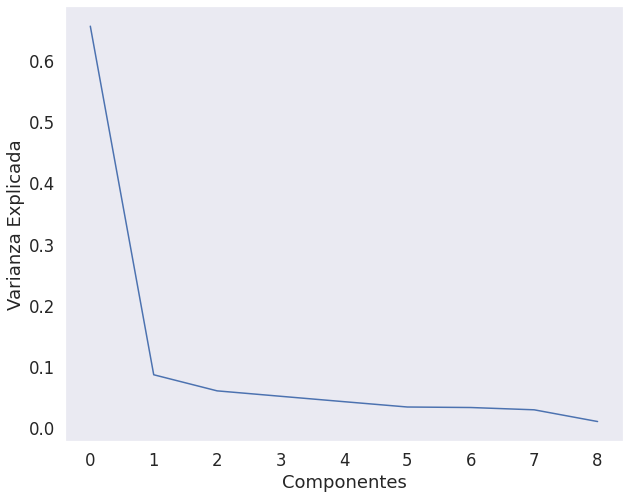

In [ ]:
# Porcentaje de varianza por componente en un grafico
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Varianza Explicada')
plt.xlabel('Componentes')
plt.show()

In [ ]:
# Escalo los datos
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Aplico Componentes principales
pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)
pca.components_[:,0] #vemos la influencia de las variables originales con las combinaciones lineales en pca.components_

array([ 0.30206257, -0.14080053, -0.86637245, -0.10782844, -0.08032124,
        0.24251752,  0.00851567,  0.24770729,  0.00274744])

In [ ]:
print([round(x,3) for x in pca.components_[:,0]])

[0.302, -0.141, -0.866, -0.108, -0.08, 0.243, 0.009, 0.248, 0.003]


In [ ]:
pca.components_[:,1]

array([ 0.38079297, -0.04664031,  0.0199378 ,  0.2042554 ,  0.14565287,
        0.13903168,  0.20543426, -0.43629981,  0.73321094])

In [ ]:
print([round(x,3) for x in pca.components_[:,1]])

[0.381, -0.047, 0.02, 0.204, 0.146, 0.139, 0.205, -0.436, 0.733]


In [ ]:
# Varianza explicada por cada componente
var_pc = pca.explained_variance_ratio_
#print(var_pc)

indice = 1
for var in var_pc:
    print("PCA{:02} : {:05.4f}".format(indice, round(var,4)))
    indice += 1

PCA01 : 0.6555
PCA02 : 0.0862
PCA03 : 0.0599
PCA04 : 0.0511
PCA05 : 0.0423
PCA06 : 0.0335
PCA07 : 0.0327
PCA08 : 0.0290
PCA09 : 0.0098


In [ ]:
#Varianza explicada por cada componente
print(pca.explained_variance_ratio_)
print([round(x,14) for x in pca.explained_variance_ratio_])

[0.65549993 0.08621632 0.05991692 0.05106972 0.04225287 0.03354183
 0.03271141 0.02897065 0.00982036]
[0.65549992771261, 0.08621632057056, 0.05991691551532, 0.05106971715377, 0.04225286985667, 0.0335418278807, 0.03271141274454, 0.0289706508462, 0.00982035771962]


# Grafico las primeras dos componentes principales

([<matplotlib.lines.Line2D object at 0x7f2adcc88090>, <matplotlib.lines.Line2D object at 0x7f2adcc88310>], ['$\\mathdefault{0}$', '$\\mathdefault{1}$'])


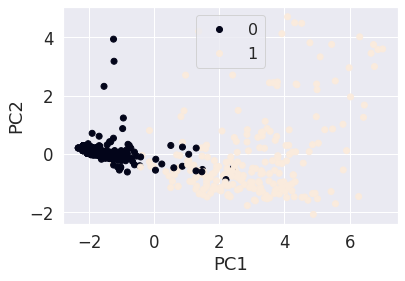

In [ ]:
def myplot(score,coeff,labels=None,target_names=None,titulo1='Vista PCA',titulo2='Vista proyeccion var originales'):
     x1 = score[:,0]
     x2 = score[:,1]
     n = coeff.shape[0]

     clases = target_names
     scatter = plt.scatter(x1, x2, c=y, alpha=1) #, cmap= "blue", "red")
     plt.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=19)
     print(scatter.legend_elements())
     plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)


#Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");


#Grafico las primeras dos componentes principales
myplot(x_new[:,0:2], pca.components_, t)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

9
[[ 3.02062573e-01  3.80792973e-01  3.77582540e-01  3.32723572e-01
   3.36234038e-01  3.35067511e-01  3.45747366e-01  3.35591377e-01
   2.30206398e-01]
 [-1.40800531e-01 -4.66403106e-02 -8.24224677e-02 -5.20943760e-02
   1.64404385e-01 -2.61260621e-01 -2.28076759e-01  3.39658225e-02
   9.05557290e-01]
 [-8.66372452e-01  1.99378011e-02 -3.35108706e-02  4.12647341e-01
   8.77425288e-02 -6.91477952e-04  2.13071845e-01  1.34248356e-01
  -8.04921698e-02]
 [-1.07828438e-01  2.04255399e-01  1.75865604e-01 -4.93172568e-01
   4.27383577e-01 -4.98617672e-01 -1.30473383e-02  4.17113466e-01
  -2.58987810e-01]
 [-8.03212439e-02  1.45652870e-01  1.08391546e-01  1.95689775e-02
   6.36693247e-01  1.24772942e-01 -2.27665715e-01 -6.90210155e-01
  -1.05041675e-01]
 [ 2.42517517e-01  1.39031681e-01  7.45271259e-02  6.54628771e-01
  -6.93089143e-02 -6.09220540e-01 -2.98897334e-01 -2.15181955e-02
  -1.48345154e-01]
 [ 8.51566756e-03  2.05434260e-01  1.27209198e-01 -1.23830400e-01
  -2.11018210e-01 -4.02790

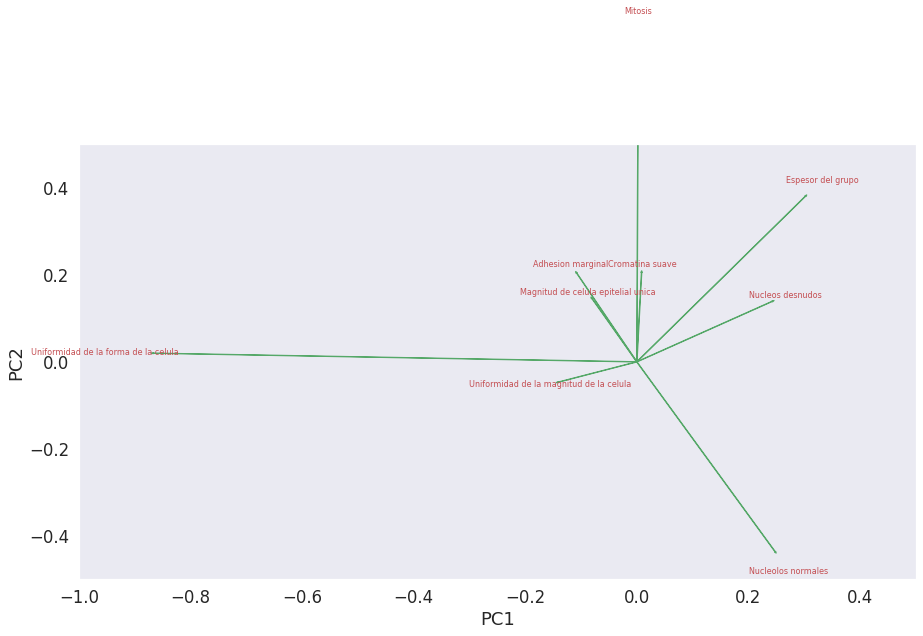

In [ ]:
# Definimos el rango de los ejes del grafico
plt.axis([-1, 0.25, -0.5, 1.5])

# Vemos cuantos vectores son las direcciones de maxima varianza
n = pca.components_.shape[0]
print(n)
print(pca.components_)

# Recorremos esos vectores y los vamos dibujando en el plano
for i in range(n):
    plt.arrow(0, 0, pca.components_[i,0], pca.components_[i,1], color = 'g', alpha = 1)
    # En el extremo de cada vector ponemos en nombre de la columan correspondiente (un poco dezplazados)
    plt.text(pca.components_[i,0]*1.1 , pca.components_[i,1]*1.1, t[i], color = 'r', ha = 'center', va = 'center', fontsize=8)
    plt.xlim(None,0.5)
    plt.ylim(None, 0.5)

# Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");

# imprimimos el grafico completo
plt.show();

# Clasificador bayesiano ingenuo


Métricas sobre datos de TEST
Accuracy:  0.97
Recall:  0.97
Precision:  0.95


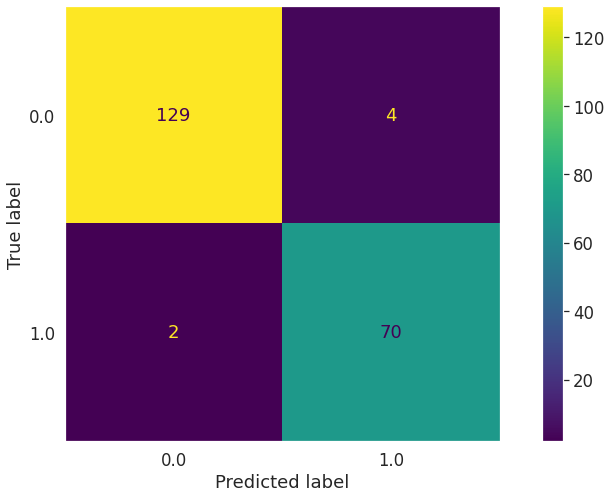

In [ ]:
gnb = GaussianNB() #instancio la clase
modelo_gnb = gnb.fit(X_train, y_train) #entreno modelo predictivo a partir de los datos, es decir construyo en borde de decisión
y_pred_test = modelo_gnb.predict(X_test) #clasifico según modelo. Por defecto clasifica según la clase con probablidad más alta

# matriz de confusión
conf_g = confusion_matrix(y_test,y_pred_test)

# grafico matriz de confusión
disp_g = ConfusionMatrixDisplay(confusion_matrix=conf_g, display_labels=gnb.classes_)
disp_g.plot(values_format='d')

# métricas de evaluación sobre los datos de TESTEO.
accuracy_g = accuracy_score(y_test, y_pred_test)
recall_g = recall_score(y_test, y_pred_test)
precision_g = precision_score(y_test, y_pred_test)

print('Métricas sobre datos de TEST')
print('Accuracy: ', round(accuracy_g,2))
print('Recall: ', round(recall_g,2))
print('Precision: ', round(precision_g,2))


Métricas sobre datos nuevos de TEST, punto de corte arbitrario 0.7
Accuracy:  0.97
Recall:  0.96
Precision:  0.95
F1:  0.95
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       133
         1.0       0.95      0.96      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



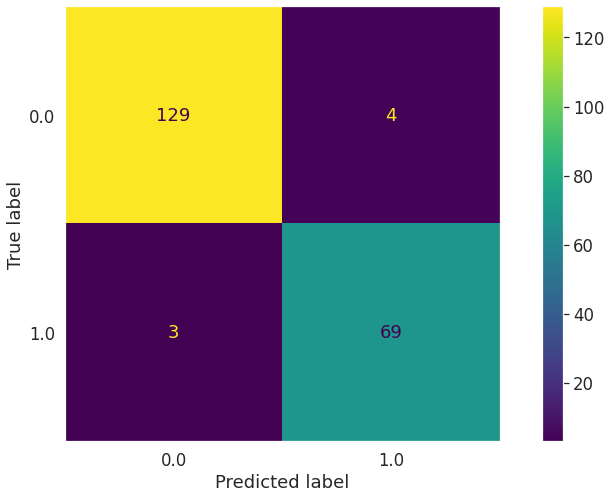

In [ ]:
#implemento un punto de corte en 0.7
probas = modelo_gnb.predict_proba(X_test)

# por ejemplo, por defecto asumo que si termina en venta (y=1)
y_pred_test_custom = np.ones(y_test.shape)

#y si la probabilidad de y=0 es mayor a 0.7, lo clasifico como no venta (y=0)
for i in range(probas.shape[0]):
    if (probas[i,0]>0.2):
        y_pred_test_custom[i]=0.

# matriz de confusión
conf_custom = confusion_matrix(y_test,y_pred_test_custom)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_custom, display_labels=gnb.classes_)
disp.plot(values_format='d')

#métricas de evaluación sobre los datos de TESTEO, punto de corte arbitrario
accuracy_custom = accuracy_score(y_test, y_pred_test_custom)
recall_custom = recall_score(y_test, y_pred_test_custom)
precision_custom = precision_score(y_test, y_pred_test_custom)
f1_custom = f1_score(y_test, y_pred_test_custom)
clasif_report_custom = classification_report(y_test, y_pred_test_custom)

print('')
print('Métricas sobre datos nuevos de TEST, punto de corte arbitrario 0.7')
print('Accuracy: ', round(accuracy_custom,2))
print('Recall: ', round(recall_custom,2))
print('Precision: ', round(precision_custom,2))
print('F1: ', round(f1_custom,2))
print('Classification Report:')
print(clasif_report_custom)

Clasificador Análisis Discriminante Lineal

Métricas sobre datos de TEST sin punto de corte arbitrario
Accuracy:  0.95
Recall:  0.89
Precision:  0.97
F1:  0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       133
         1.0       0.97      0.89      0.93        72

    accuracy                           0.95       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



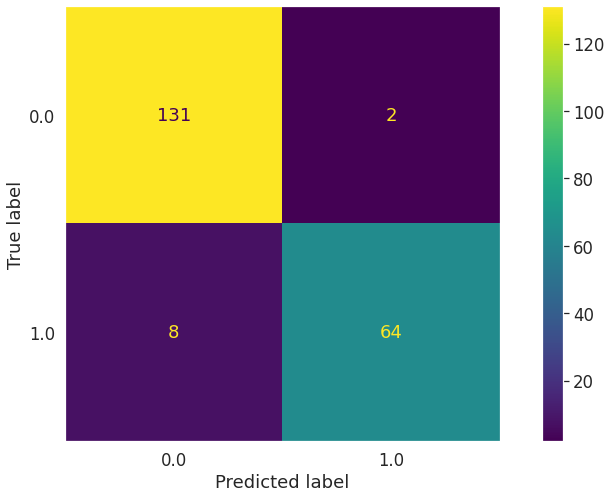

In [ ]:
lda = LinearDiscriminantAnalysis() #instancio la clase
modelo_lda = lda.fit(X_train, y_train) #entreno modelo predictivo a partir de los datos, es decir construyo en borde de decisión
y_pred_test_dl = modelo_lda.predict(X_test) #clasifico según modelo. Por defecto clasifica según la clase con probablidad más alta


# matriz de confusión
conf = confusion_matrix(y_test,y_pred_test_dl)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=lda.classes_)
disp.plot(values_format='d')

# métricas de evaluación sobre los datos de TESTEO.
accuracy_dl = accuracy_score(y_test, y_pred_test_dl)
recall_dl = recall_score(y_test, y_pred_test_dl)
precision_dl = precision_score(y_test, y_pred_test_dl)
f1_dl = f1_score(y_test, y_pred_test_dl)
clasif_report_dl = classification_report(y_test, y_pred_test_dl)


print('Métricas sobre datos de TEST sin punto de corte arbitrario')
print('Accuracy: ', round(accuracy_dl,2))
print('Recall: ', round(recall_dl,2))
print('Precision: ', round(precision_dl,2))
print('F1: ', round(f1_dl,2))
print('Classification Report:')
print(clasif_report_dl)

# Clasificador Regresión Logística



Métricas sobre datos de TEST sin punto de corte arbitrario
Accuracy:  0.96
Recall:  0.92
Precision:  0.96
F1:  0.94
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       133
         1.0       0.96      0.92      0.94        72

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



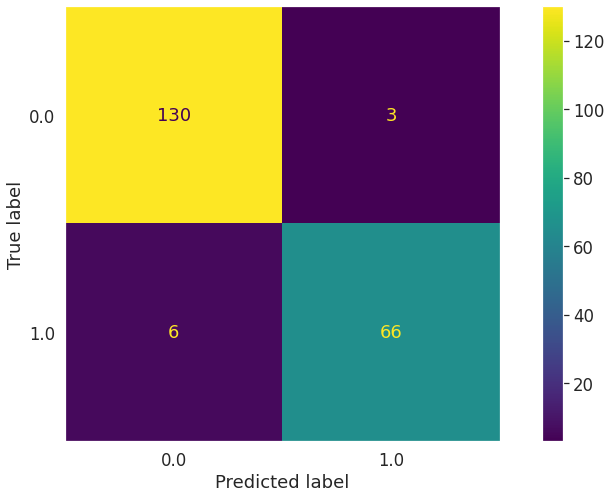

In [ ]:
lg = LogisticRegression() #instancio la clase
modelo_lg = lg.fit(X_train, y_train)
# clasifico según el modelo, es decir predigo las clases, con los datos de TESTEO.
y_pred_test = modelo_lg.predict(X_test)

# matriz de confusión
conf = confusion_matrix(y_test,y_pred_test)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=lg.classes_)
disp.plot(values_format='d')

# métricas de evaluación sobre los datos de TESTEO.
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
clasif_report = classification_report(y_test, y_pred_test)


print('Métricas sobre datos de TEST sin punto de corte arbitrario')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))
print('Classification Report:')
print(clasif_report)


# Coeficientes de la Regresión Logística

In [ ]:
lg.coef_

array([[1.59526782, 0.4522447 , 0.63273305, 0.85692143, 0.33142119,
        1.39424024, 1.01496089, 0.2698819 , 0.80270889]])

# Evaluación en TEST por Curva ROC

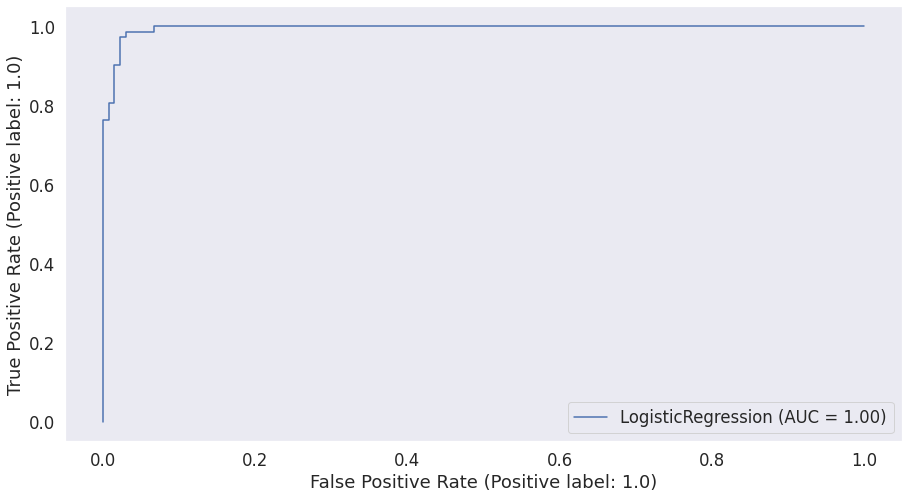

In [ ]:
plot_roc_curve(modelo_lg, X_test, y_test)

###Variando punto de corte



Métricas sobre datos nuevos de TEST, punto de corte arbitrario 0.7
Accuracy:  0.94
Recall:  0.86
Precision:  0.97
F1:  0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       133
         1.0       0.97      0.86      0.91        72

    accuracy                           0.94       205
   macro avg       0.95      0.92      0.93       205
weighted avg       0.94      0.94      0.94       205



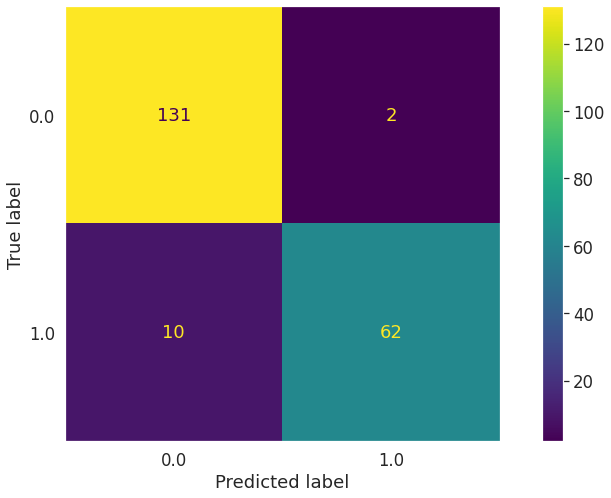

In [ ]:

#implemento un punto de corte en 0.7
probas = modelo_lg.predict_proba(X_test)

# por ejemplo, por defecto asumo que si termina en venta (y=1)
y_pred_test_custom = np.ones(y_test.shape)

#y si la probabilidad de y=0 es mayor a 0.7, lo clasifico como no venta (y=0)
for i in range(probas.shape[0]):
    if (probas[i,0]>0.2):
        y_pred_test_custom[i]=0.

# matriz de confusión
conf_custom = confusion_matrix(y_test,y_pred_test_custom)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_custom, display_labels=lg.classes_)
disp.plot(values_format='d')

#métricas de evaluación sobre los datos de TESTEO, punto de corte arbitrario
accuracy_custom = accuracy_score(y_test, y_pred_test_custom)
recall_custom = recall_score(y_test, y_pred_test_custom)
precision_custom = precision_score(y_test, y_pred_test_custom)
f1_custom = f1_score(y_test, y_pred_test_custom)
clasif_report_custom = classification_report(y_test, y_pred_test_custom)

print('')
print('Métricas sobre datos nuevos de TEST, punto de corte arbitrario 0.7')
print('Accuracy: ', round(accuracy_custom,2))
print('Recall: ', round(recall_custom,2))
print('Precision: ', round(precision_custom,2))
print('F1: ', round(f1_custom,2))
print('Classification Report:')
print(clasif_report_custom)

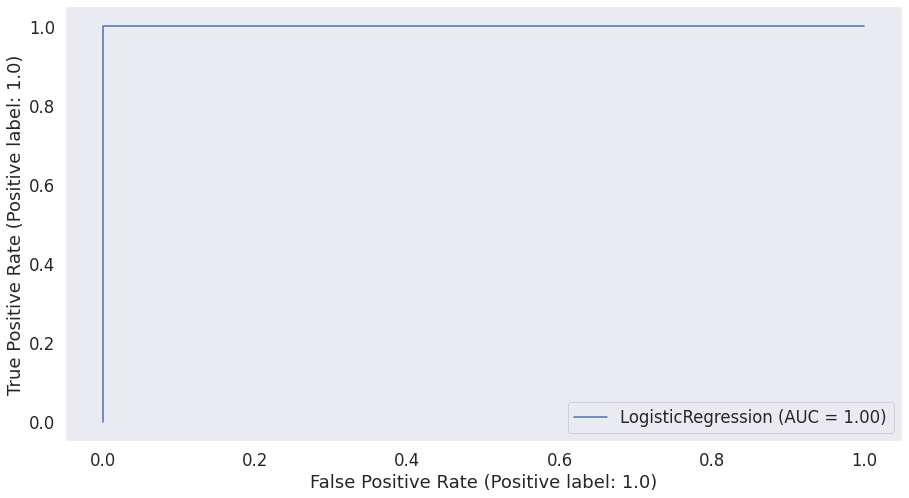

In [ ]:
plot_roc_curve(modelo_lg, X_test, y_pred_test_custom)


Métricas sobre datos nuevos de TEST, punto de corte arbitrario 0.7
Accuracy:  0.96
Recall:  0.93
Precision:  0.96
F1:  0.94
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       133
         1.0       0.96      0.93      0.94        72

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205



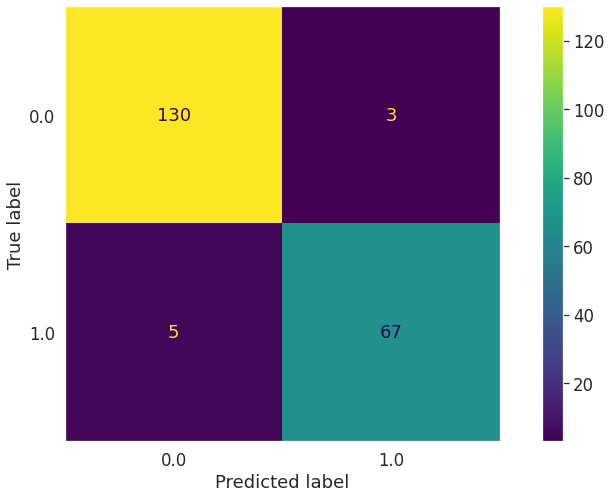

In [ ]:
#implemento un punto de corte en 0.7
probas_07 = modelo_lg.predict_proba(X_test)

# por ejemplo, por defecto asumo que si termina en venta (y=1)
y_pred_test_custom_07 = np.ones(y_test.shape)

#y si la probabilidad de y=0 es mayor a 0.7, lo clasifico como no venta (y=0)
for i in range(probas.shape[0]):
    if (probas[i,0]>0.7):
        y_pred_test_custom_07[i]=0.

# matriz de confusión
conf_custom_07 = confusion_matrix(y_test,y_pred_test_custom_07)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_custom_07, display_labels=lg.classes_)
disp.plot(values_format='d')

#métricas de evaluación sobre los datos de TESTEO, punto de corte arbitrario
accuracy_custom_07 = accuracy_score(y_test, y_pred_test_custom_07)
recall_custom_07 = recall_score(y_test, y_pred_test_custom_07)
precision_custom_07 = precision_score(y_test, y_pred_test_custom_07)
f1_custom_07 = f1_score(y_test, y_pred_test_custom_07)
clasif_report_custom_07 = classification_report(y_test, y_pred_test_custom_07)

print('')
print('Métricas sobre datos nuevos de TEST, punto de corte arbitrario 0.7')
print('Accuracy: ', round(accuracy_custom_07,2))
print('Recall: ', round(recall_custom_07,2))
print('Precision: ', round(precision_custom_07,2))
print('F1: ', round(f1_custom_07,2))
print('Classification Report:')
print(clasif_report_custom_07)

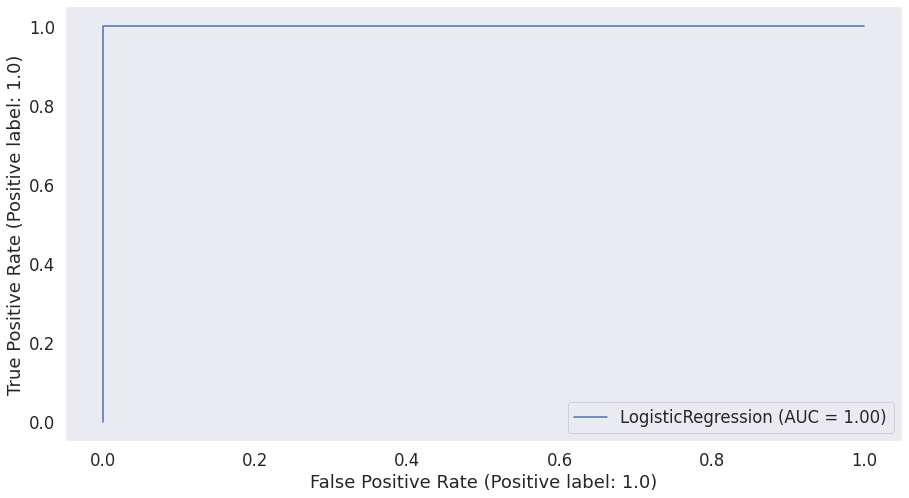

In [ ]:
plot_roc_curve(modelo_lg, X_test, y_pred_test_custom_07)

# Clasificador Regresión Logística sin usar train/test

Métricas sobre datos sin TEST
Accuracy:  0.97
Recall:  0.96
Precision:  0.96


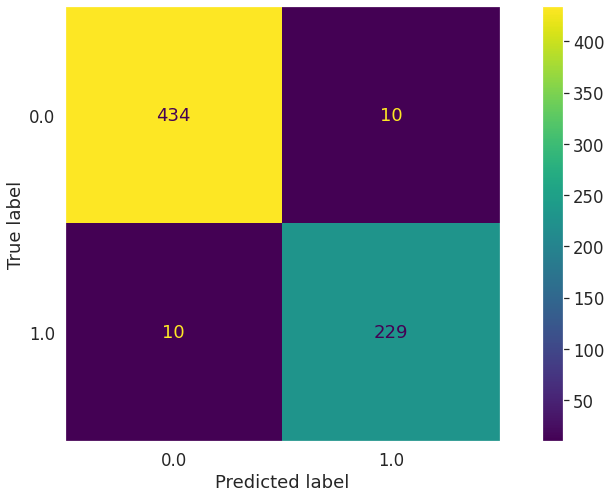

In [ ]:
lg_base = LogisticRegression() #instancio la clase
modelo_lg_base =lg_base.fit(X, y)
# clasifico según el modelo, es decir predigo las clases, con los datos de TESTEO.
y_pred_test_base = modelo_lg_base.predict(X)

# matriz de confusión
conf_base = confusion_matrix(y,y_pred_test_base)

# grafico matriz de confusión
disp_base = ConfusionMatrixDisplay(confusion_matrix=conf_base, display_labels=lg_base.classes_)
disp_base.plot(values_format='d')

# métricas de evaluación sobre los datos de TESTEO.
accuracy = accuracy_score(y, y_pred_test_base)
recall = recall_score(y, y_pred_test_base)
precision = precision_score(y, y_pred_test_base)

print('Métricas sobre datos sin TEST')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

# Coeficientes de la Regresión Logística sin usar train/test

In [ ]:
lg_base.coef_

array([[1.32449149, 0.23824727, 0.80368934, 0.80326261, 0.24988956,
        1.29572094, 0.95532122, 0.6022216 , 0.72393392]])

Aplico componentes principales al modelo de regrecion logistica elegido como mejor 20% de datos para test y punto de corte 0.8

In [ ]:
pca_reglog = PCA()
pca_reglog.fit(X,y_pred_test_custom)
x_new_reglog = pca_reglog.transform(X)
pca_reglog.components_[:,0]

array([ 0.30206257, -0.14080053, -0.86637245, -0.10782844, -0.08032124,
        0.24251752,  0.00851567,  0.24770729,  0.00274744])

In [ ]:
print([round(x,3) for x in pca_reglog.components_[:,0]])

[0.302, -0.141, -0.866, -0.108, -0.08, 0.243, 0.009, 0.248, 0.003]


In [ ]:
pca_reglog.components_[:,1]

array([ 0.38079297, -0.04664031,  0.0199378 ,  0.2042554 ,  0.14565287,
        0.13903168,  0.20543426, -0.43629981,  0.73321094])

In [ ]:
print([round(x,3) for x in pca_reglog.components_[:,1]])

[0.381, -0.047, 0.02, 0.204, 0.146, 0.139, 0.205, -0.436, 0.733]


In [ ]:
#Varianza explicada por cada componente
print(pca_reglog.explained_variance_ratio_)
print([round(x,3) for x in pca_reglog.explained_variance_ratio_])

[0.65549993 0.08621632 0.05991692 0.05106972 0.04225287 0.03354183
 0.03271141 0.02897065 0.00982036]
[0.655, 0.086, 0.06, 0.051, 0.042, 0.034, 0.033, 0.029, 0.01]


# Grafico las primeras dos componentes principales

([<matplotlib.lines.Line2D object at 0x7fc1db565090>, <matplotlib.lines.Line2D object at 0x7fc1db5735d0>], ['$\\mathdefault{0}$', '$\\mathdefault{1}$'])


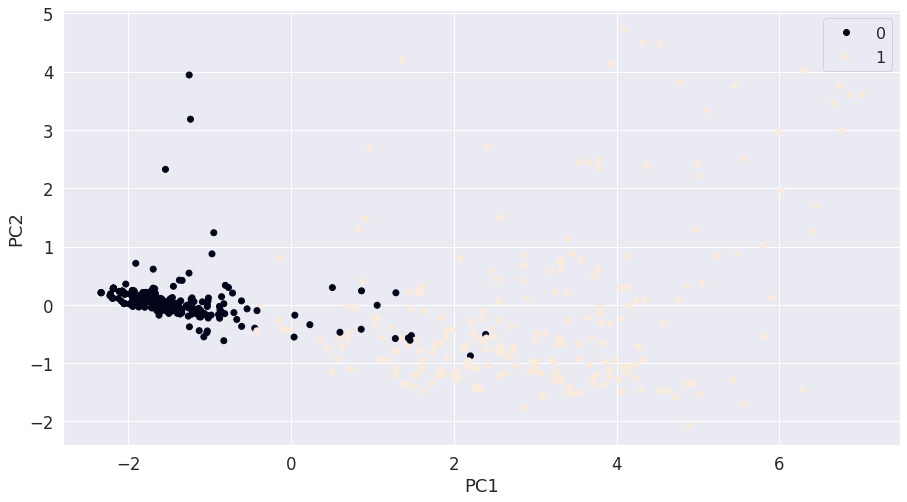

In [ ]:
def myplot(score,coeff,labels=None,target_names=None,titulo1='Vista PCA',titulo2='Vista proyeccion var originales'):
     x1 = score[:,0]
     x2 = score[:,1]
     n = coeff.shape[0]

     clases = target_names
     scatter = plt.scatter(x1, x2, c=y, alpha=1) #, cmap=colours)
     plt.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=19)
     print(scatter.legend_elements())
     plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)


#Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");


#Grafico las primeras dos componentes principales
myplot(x_new_reglog[:,0:2], pca_reglog.components_, t)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

9
[[ 3.02062573e-01  3.80792973e-01  3.77582540e-01  3.32723572e-01
   3.36234038e-01  3.35067511e-01  3.45747366e-01  3.35591377e-01
   2.30206398e-01]
 [-1.40800531e-01 -4.66403106e-02 -8.24224677e-02 -5.20943760e-02
   1.64404385e-01 -2.61260621e-01 -2.28076759e-01  3.39658225e-02
   9.05557290e-01]
 [-8.66372452e-01  1.99378011e-02 -3.35108706e-02  4.12647341e-01
   8.77425288e-02 -6.91477952e-04  2.13071845e-01  1.34248356e-01
  -8.04921698e-02]
 [-1.07828438e-01  2.04255399e-01  1.75865604e-01 -4.93172568e-01
   4.27383577e-01 -4.98617672e-01 -1.30473383e-02  4.17113466e-01
  -2.58987810e-01]
 [-8.03212439e-02  1.45652870e-01  1.08391546e-01  1.95689775e-02
   6.36693247e-01  1.24772942e-01 -2.27665715e-01 -6.90210155e-01
  -1.05041675e-01]
 [ 2.42517517e-01  1.39031681e-01  7.45271259e-02  6.54628771e-01
  -6.93089143e-02 -6.09220540e-01 -2.98897334e-01 -2.15181955e-02
  -1.48345154e-01]
 [ 8.51566756e-03  2.05434260e-01  1.27209198e-01 -1.23830400e-01
  -2.11018210e-01 -4.02790

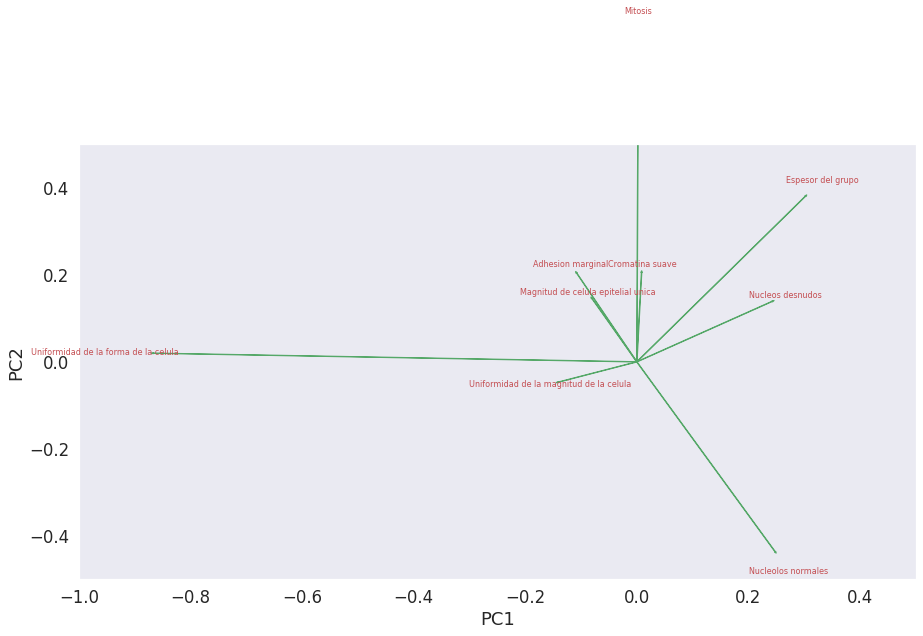

In [ ]:
# Definimos el rango de los ejes del grafico
plt.axis([-1,0.25,-0.5,1])

# Vemos cuantos vectores son las direcciones de maxima varianza
n_reglog = pca_reglog.components_.shape[0]
print(n_reglog)
print(pca_reglog.components_)

# Recorremos esos vectores y los vamos dibujando en el plano
for i in range(n):
    plt.arrow(0, 0, pca_reglog.components_[i,0], pca_reglog.components_[i,1], color = 'g', alpha = 1)
    # En el extremo de cada vector ponemos en nombre de la columan correspondiente (un poco dezplazados)
    plt.text(pca_reglog.components_[i,0]*1.1 , pca_reglog.components_[i,1]*1.1, t[i], color = 'r', ha = 'center', va = 'center', fontsize=8)
    plt.xlim(None,0.5)
    plt.ylim(None, 0.5)

# Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");

# imprimimos el grafico completo
plt.show();